In [1]:
# import the necessary packages
from keras.applications import ResNet50
# todo: without these models so far
# from keras.applications import InceptionV3
# from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2
import h5py
from IPython.display import display
from PIL import Image

Using TensorFlow backend.


In [107]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.utils import np_utils
from keras import callbacks
from keras import optimizers, regularizers
from keras.layers import Conv2D, MaxPooling2D

In [108]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [77]:
import os

In [2]:
# define a dictionary that maps model names to their classes
# inside Keras
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
#     todo without these models so far
#     "inception": InceptionV3,
#     "xception": Xception, # TensorFlow ONLY
    "resnet": ResNet50
}

In [3]:
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

In [4]:
chosen_model = "vgg16"

In [5]:
print("[INFO] loading {}...".format(chosen_model))
Network = MODELS[chosen_model]
model = Network(weights="imagenet")

[INFO] loading vgg16...


In [92]:
os.getcwd()

'C:\\Users\\Vladamir Mazin\\DeepNN'

In [97]:
path = os.getcwd() + "\\" + os.path.join( "data", "")

In [98]:
path

'C:\\Users\\Vladamir Mazin\\DeepNN\\data\\'

In [99]:
# dimensions of the image is 500 x 375
image_name = '846d6384787fff8dc17d488e6b86c209.jpg'

In [109]:
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network
print("[INFO] loading and pre-processing image...")
raw_image = load_img(path + image_name, target_size=inputShape)
raw_image = img_to_array(raw_image)

[INFO] loading and pre-processing image...


In [ ]:
# raw_image

In [111]:
# our input image is now represented as a NumPy array of shape
# (inputShape[0], inputShape[1], 3) however we need to expand the
# dimension by making the shape (1, inputShape[0], inputShape[1], 3)
# so we can pass it through thenetwork
image = np.expand_dims(raw_image, axis=0)

In [103]:
# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
image = preprocess(image)

In [ ]:
# image

In [106]:
# classify the image
print("[INFO] classifying image with '{}'...".format(model))
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)
 
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

[INFO] classifying image with '<keras.engine.training.Model object at 0x000001CD9CD41A90>'...
40960/35363 [==================================] - 0s 5us/step
1. Lhasa: 44.29%
2. Shih-Tzu: 15.68%
3. Tibetan_terrier: 9.76%
4. soft-coated_wheaten_terrier: 7.40%
5. Dandie_Dinmont: 4.28%


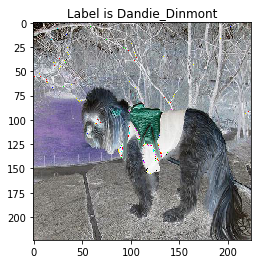

In [118]:
pixels = raw_image
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels)
# plt.grid(False)
plt.show()

In [ ]:
# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen
orig = cv2.imread(path + image_name)
(imagenetID, label, prob) = P[0][0]
cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
cv2.imshow("Classification", orig)
cv2.waitKey(0)